# Introduction To Forecasting Models

## Holt Winters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq='MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


### 1. Test Train Split

- About 20% for Testing the model
- It depends on how long the sample is or how far ahead you want to forecast

__Testing Data should be at least as large as the maximum forecast horizon required__

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
train_data = df.iloc[:109] # .loc[:'1940-01-01']
test_data = df.iloc[108:]

### 2. Fit the Model on Training Data

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

### 3. Evaluate the Model on Testing Data

In [9]:
# We want to forecast 36 months
test_pred = fitted_model.forecast(steps=36)

/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [10]:
test_pred

1958-02-01    335.437776
1958-03-01    390.636089
1958-04-01    381.680336
1958-05-01    384.737895
1958-06-01    443.243266
1958-07-01    493.115501
1958-08-01    489.417591
1958-09-01    431.504538
1958-10-01    376.606290
1958-11-01    330.831805
1958-12-01    374.393167
1959-01-01    382.895776
1959-02-01    376.098414
1959-03-01    437.987682
1959-04-01    427.946342
1959-05-01    431.374528
1959-06-01    496.971724
1959-07-01    552.889304
1959-08-01    548.743146
1959-09-01    483.810067
1959-10-01    422.257237
1959-11-01    370.934124
1959-12-01    419.775847
1960-01-01    429.309115
1960-02-01    421.687799
1960-03-01    491.079075
1960-04-01    479.820558
1960-05-01    483.664297
1960-06-01    557.212965
1960-07-01    619.908685
1960-08-01    615.259944
1960-09-01    542.455896
1960-10-01    473.441839
1960-11-01    415.897511
1960-12-01    470.659663
1961-01-01    481.348521
Freq: MS, dtype: float64

### 4. Plot Predictions against our Real Data

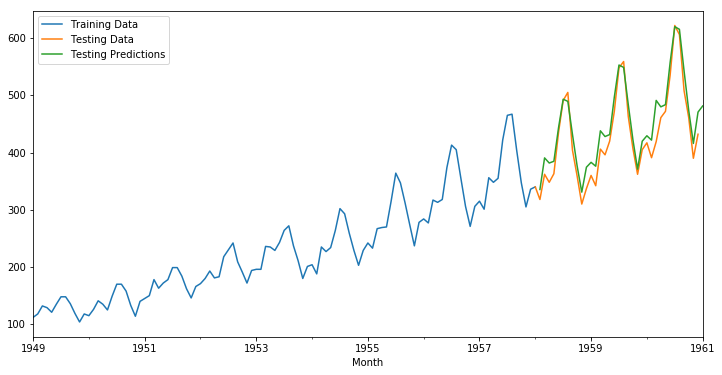

In [17]:
train_data['Thousands of Passengers'].plot(legend=True,label='Training Data',figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True,label='Testing Data',figsize=(12,6))
test_pred.plot(legend=True,label='Testing Predictions',figsize=(12,6));

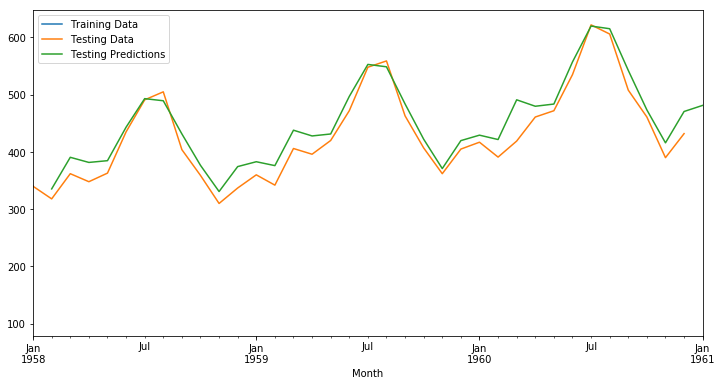

In [19]:
train_data['Thousands of Passengers'].plot(legend=True,label='Training Data',figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True,label='Testing Data')
test_pred.plot(legend=True,label='Testing Predictions',xlim=['1958-01-01','1961-01-01']);

### 5. Metrics

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
# Mean = 428.5 Thousands of Passengers
# Standard Deviation = 79.32 Thousands of Passengers
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [21]:
MAE = mean_absolute_error(test_data,test_pred)
MAE

47.5923632637332

In [22]:
MSE = mean_squared_error(test_data,test_pred)
MSE

3090.0758259693885

In [24]:
RSME = np.sqrt(MSE)
RSME

55.58845047282204

__Our RMSE = 55.58 is less than STD = 79.32! not quite bad!__

### 6. Refit the model on the entire Dataset

In [26]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12).fit()

### 7. Forecast for Future Data

In [27]:
# Forecasting 3 years
forecast_pred = final_model.forecast(steps=36)

/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


### 8. Plot Our Future Predicitions

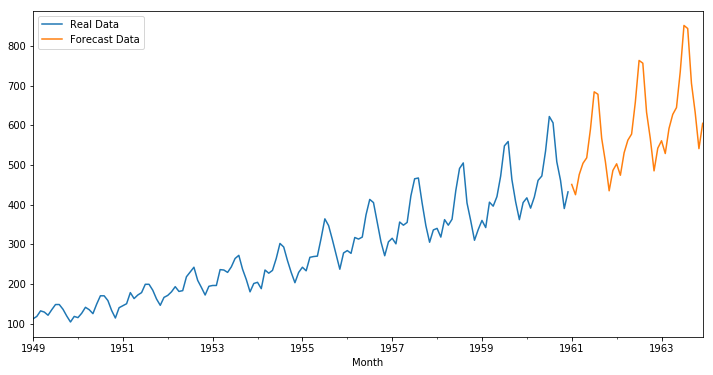

In [30]:
df['Thousands of Passengers'].plot(legend=True,label='Real Data',figsize=(12,6))
forecast_pred.plot(legend=True,label='Forecast Data');